In [1]:
import cv2
import csv
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pylab as pl
import bobsegutils as bsu
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

Populating the interactive namespace from numpy and matplotlib


In [2]:
image_path = '/Users/prakash/Desktop/BobSegMarkData/2018-05-01_fromMark/MAX_C1-20180501_mNG-NMY-2_mSc-PH_01-01_Myosin.tif'
src_img = imread(image_path)
img_size = src_img.shape
row_size = range(0,img_size[1])
col_size = range(0,img_size[2])
print(img_size)

(61, 836, 628)


In [3]:
Xpts = range(0, img_size[1])
Ypts = range(0, img_size[2])
Points = np.array(list(itertools.product(Xpts, Ypts))).astype(float32)

In [4]:
image_index = 2 # The image time point(exclusive of) until which TSP is to be applied based on selected control points
flow_x = np.zeros(shape=(image_index,img_size[1],img_size[2]))
flow_y = np.zeros(shape=(image_index,img_size[1],img_size[2]))

### Thi Plate SPline Based Warping/Flow Estimation

In [5]:
for index in range(1, image_index,1):
   
    tps = cv2.createThinPlateSplineShapeTransformer()
    source_filename = "/Users/prakash/Desktop/MarkGT/Choices_Structured.csv"
    target_filename = "/Users/prakash/Desktop/MarkGT/Tracks_Structured.csv"
    input_source_file = open(source_filename,"r+")
    input_target_file = open(target_filename,"r+")
    source_reader_file = csv.reader(input_source_file)
    target_reader_file = csv.reader(input_target_file)
    fraction = 0.3
    skip = int((len(list(source_reader_file))-1)*fraction)
    print(skip)
    sshape = np.genfromtxt(source_filename,delimiter=',', skip_header =1, max_rows=skip).astype(float32)
    tshape = np.genfromtxt(target_filename,delimiter=',', skip_header =1, max_rows=skip).astype(float32)
    print(sshape)
    print(tshape)

    sshape = sshape.reshape(1,-1,2)
    tshape = tshape.reshape(1,-1,2)
    matches = list()

    for i in range(0, sshape.shape[1],1):
        matches.append(cv2.DMatch(i,i,0))

    tps.estimateTransformation(sshape,tshape,matches)  
    ret, tshape_ = tps.applyTransformation (Points.reshape(1,-1,2))
    target_warp = tshape_.reshape(img_size[1],img_size[2],2)

    # Creating flow
    tsp_flow_x = np.zeros(shape=(img_size[1],img_size[2]))
    tsp_flow_y = np.zeros(shape=(img_size[1],img_size[2]))

    for row in range(img_size[1]):
        for col in range(img_size[2]):
            tsp_flow_x[row][col] = target_warp[row][col][0] - row
            tsp_flow_y[row][col] = target_warp[row][col][1] - col
    flow_x[index-1,:,:] = tsp_flow_x
    flow_y[index-1,:,:] = tsp_flow_y

42
[[284. 380.]
 [269. 396.]
 [304. 365.]
 [319. 364.]
 [328. 373.]
 [333. 382.]
 [334. 388.]
 [358. 383.]
 [346. 372.]
 [339. 397.]
 [344. 404.]
 [353. 400.]
 [369. 400.]
 [357. 425.]
 [359. 443.]
 [366. 452.]
 [352. 465.]
 [345. 479.]
 [354. 482.]
 [352. 500.]
 [340. 504.]
 [340. 513.]
 [359. 516.]
 [353. 518.]
 [337. 526.]
 [338. 535.]
 [363. 543.]
 [330. 510.]
 [380. 553.]
 [375. 557.]
 [370. 558.]
 [374. 563.]
 [367. 566.]
 [379. 575.]
 [382. 584.]
 [366. 600.]
 [354. 603.]
 [338. 602.]
 [291. 603.]
 [299. 606.]
 [293. 596.]
 [253. 594.]]
[[285. 381.]
 [271. 396.]
 [304. 368.]
 [319. 367.]
 [325. 376.]
 [329. 382.]
 [330. 389.]
 [349. 384.]
 [342. 372.]
 [332. 397.]
 [340. 407.]
 [351. 400.]
 [368. 398.]
 [350. 426.]
 [359. 440.]
 [364. 450.]
 [353. 466.]
 [347. 480.]
 [357. 479.]
 [348. 502.]
 [337. 505.]
 [338. 512.]
 [353. 513.]
 [350. 516.]
 [333. 528.]
 [335. 538.]
 [359. 544.]
 [327. 511.]
 [374. 553.]
 [372. 557.]
 [364. 558.]
 [371. 564.]
 [363. 565.]
 [376. 578.]
 [378. 5

In [6]:
validation_source_filename = "/Users/prakash/Desktop/MarkGT/Choices_Structured.csv"
validation_source_file = open(validation_source_filename,"r+")
validation_target_filename = "/Users/prakash/Desktop/MarkGT/Tracks_Structured.csv"
validation_target_file = open(validation_target_filename,"r+")

validation_source_reader = csv.reader(validation_source_file)
validation_target_reader = csv.reader(validation_target_file)

validation_query_point_list = np.genfromtxt(validation_source_filename,delimiter=',', skip_header = skip+1).astype(float32)
validation_result_point_list = np.genfromtxt(validation_target_filename,delimiter=',', skip_header =skip+1).astype(float32)

In [7]:
flow_points_flat_list = []

In [8]:
for number in range(0, len(validation_query_point_list), 1):
    print("Validation Query Point:", validation_query_point_list[number])
    print("Validation Result Point:", validation_result_point_list[number])
    print("TPS Flow Result:", target_warp[int(validation_query_point_list[number][0]), int(validation_query_point_list[number][1])])
    flow_points_flat_list.append(target_warp[int(validation_query_point_list[number][0]), int(validation_query_point_list[number][1])])

Validation Query Point: [251. 596.]
Validation Result Point: [250. 595.]
TPS Flow Result: [252.98912 591.27515]
Validation Query Point: [266. 594.]
Validation Result Point: [266. 592.]
TPS Flow Result: [268.62506 593.86926]
Validation Query Point: [269. 573.]
Validation Result Point: [268. 574.]
TPS Flow Result: [270.5186 575.8085]
Validation Query Point: [276. 567.]
Validation Result Point: [273. 572.]
TPS Flow Result: [276.8782  571.44855]
Validation Query Point: [255. 566.]
Validation Result Point: [256. 567.]
TPS Flow Result: [256.46725 566.03424]
Validation Query Point: [281. 561.]
Validation Result Point: [280. 564.]
TPS Flow Result: [281.24286 566.1827 ]
Validation Query Point: [268. 515.]
Validation Result Point: [269. 516.]
TPS Flow Result: [267.50507 518.2695 ]
Validation Query Point: [275. 507.]
Validation Result Point: [278. 508.]
TPS Flow Result: [274.06244 510.754  ]
Validation Query Point: [275. 492.]
Validation Result Point: [274. 496.]
TPS Flow Result: [274.28818 495.6

### Quantification

In [9]:
with open('/Users/prakash/Desktop/MarkGT/Tracks_with_uncertainty_radius.csv', 'r') as f:
    reader = csv.reader(f)
    uncertainty_radius_list = list(reader)
uncertainty_radius_list_full = uncertainty_radius_list[1:]
uncertainty_radius_list = uncertainty_radius_list[skip+1:]

uncertainty_radius_list=np.array(uncertainty_radius_list,integer)
uncertainty_radius_list = [item for sublist in uncertainty_radius_list for item in sublist]

print(uncertainty_radius_list)
print(len(uncertainty_radius_list))

[1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
100


In [10]:
print(len(validation_query_point_list))
print(len(validation_result_point_list))

100
100


In [11]:
pixel_lag = []
relative_pixel_lag = []
count = 0
for i in range(len(flow_points_flat_list)):
    if(bsu.euclid_dist(flow_points_flat_list[i], validation_result_point_list[i])<= uncertainty_radius_list[i]):
        
        position_offset = 0
        relative_position_offset = 0
        count = count +1
    else:
        r2 = bsu.euclid_dist(validation_query_point_list[i], flow_points_flat_list[i])
        r1 = bsu.euclid_dist(validation_query_point_list[i], validation_result_point_list[i])
        position_offset = r2-r1
        relative_position_offset = abs(position_offset)/r1
        
    
    pixel_lag.append(position_offset)
    relative_pixel_lag.append(relative_position_offset*100)

/Users/prakash/anaconda/envs/Py35forBobSeg/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in double_scalars


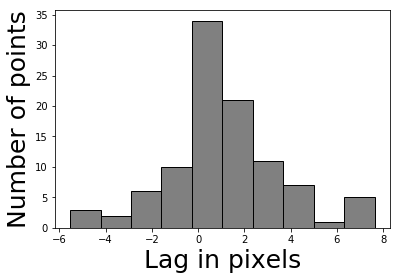

In [12]:
plt.hist(pixel_lag,histtype='bar', color='gray', ec='black')
plt.xlabel('Lag in pixels',fontsize=25)
plt.ylabel('Number of points',fontsize=25)
plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10)
plt.show()

In [13]:
print(count)

10


In [22]:
print(np.median(pixel_lag))
print(np.median(relative_pixel_lag))
print(np.percentile(pixel_lag,75))
print(np.percentile(relative_pixel_lag,50))

0.8469212756315123
46.99786721667339
2.313444431465775
46.99786721667339
